**Predicting the Stock Market with Machine Learning and Python**

**Download data**

In [6]:
#Load data

import yfinance as yf

SP500 = yf.Ticker("^GSPC")

SP500 = SP500.history(period='max')

SP500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,0.0,0.0


In [7]:
SP500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-12-18 00:00:00-05:00', '2023-12-19 00:00:00-05:00',
               '2023-12-20 00:00:00-05:00', '2023-12-21 00:00:00-05:00',
               '2023-12-22 00:00:00-05:00', '2023-12-26 00:00:00-05:00',
               '2023-12-27 00:00:00-05:00', '2023-12-28 00:00:00-05:00',
               '2023-12-29 00:00:00-05:00', '2024-01-02 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24116, freq=None)

<Axes: xlabel='Date'>

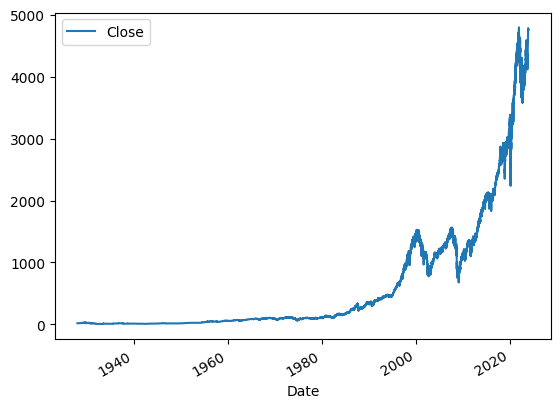

In [9]:
 #Visualise data

 SP500.plot.line(y='Close', use_index=True )

**Cleaning Data**

In [17]:
#Remove columns we don't need
del SP500['Dividends']
del SP500['Stock Splits']


**Setting our target for machine learning**

In [18]:
#Shifting our prices back one day

SP500['Tomorrow'] = SP500['Close'].shift(-1)
SP500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4781.580078
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,4769.830078


In [20]:
#Set up target based on tomorrow's prices

SP500['Target'] = (SP500['Tomorrow'] > SP500['Close']).astype(int)
SP500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4781.580078,1
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098,1
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,4769.830078,0


In [22]:
#Remove data before 1990
SP500 = SP500.loc['1990-01-01':].copy()

SP500


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4781.580078,1
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098,1
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,4769.830078,0


**Training An Initial Machine Learning Model**

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

#Split data into train and test set
train = SP500.iloc[:-100]
test = SP500.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])



RandomForestClassifier(min_samples_split=100, random_state=1)

In [26]:
#Measure accuracy

from sklearn.metrics import precision_score
import pandas as pd


preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [27]:
#Calculate the precision score

precision_score(test['Target'], preds)

0.5396825396825397

<Axes: xlabel='Date'>

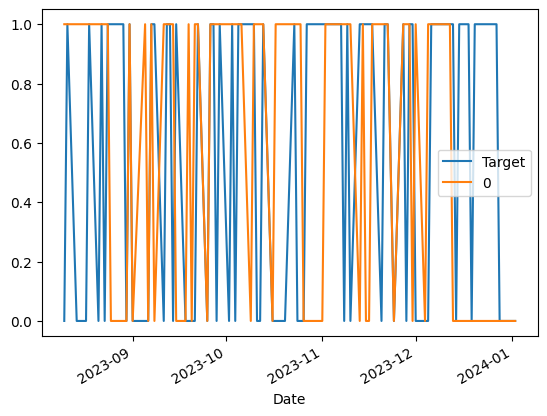

In [28]:
#Plot predictions by combining predicted values with actual values

combined = pd.concat([test['Target'], preds], axis=1)
combined.plot()

**Building a Backtest System**

In [29]:
#Create prediction function

def predict(train, test, predictors, model):
  model.fit(train[predictors], train['Target'])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name='Predictions')
  combined = pd.concat([test['Target'], preds], axis=1)
  return combined

In [37]:
#Create backtest function

def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []  #First 10 years

  #Loop over the dataset in increments
  for i in range(start, data.shape[0], step):
    #Split dataset into train and test sets
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)

  return pd.concat(all_predictions)

In [40]:
predictions = backtest(SP500, model, predictors)

#Run the function
predictions['Predictions'].value_counts()

0    3470
1    2596
Name: Predictions, dtype: int64

In [41]:
#Calculate precision score

precision_score(predictions['Target'], predictions['Predictions'])

0.5288906009244992

In [42]:
#Percentage of days the market actually went up

predictions['Target'].value_counts()/ predictions.shape[0]

1    0.534454
0    0.465546
Name: Target, dtype: float64

**Adding additional predictors to our model**

In [45]:
#Rolling means

horizons = [2,5,60,250,100]
new_predictors = []

for horizon in horizons:
  rolling_averages = SP500.rolling(horizon).mean()

  ratio_column = f'Close_Ratio_{horizon}'
  SP500[ratio_column] = SP500['Close']/ rolling_averages['Close']

  trend_column = f'Trend_{horizon}'
  SP500[trend_column] = SP500.shift(1).rolling(horizon).sum()['Target']

  new_predictors += [ratio_column, trend_column]

In [47]:
SP500 = SP500.dropna()

In [48]:
SP500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_100,Trend_100
Date,,,,,,,,,,,,,,,,,
1990-12-27 00:00:00-05:00,330.850006,331.040009,328.230011,328.290009,102900000,328.720001,1,0.996116,1.0,0.994270,2.0,1.038297,31.0,0.981221,132.0,1.031883,52.0
1990-12-28 00:00:00-05:00,328.290009,328.720001,327.239990,328.720001,111030000,330.220001,1,1.000654,1.0,0.996417,3.0,1.038708,32.0,0.982859,133.0,1.033433,52.0
1990-12-31 00:00:00-05:00,328.709991,330.230011,327.500000,330.220001,114130000,326.450012,0,1.002276,2.0,1.001893,3.0,1.042486,32.0,0.987644,134.0,1.038415,52.0
1991-01-02 00:00:00-05:00,330.200012,330.750000,326.450012,326.450012,126280000,321.910004,0,0.994259,1.0,0.992533,3.0,1.029774,32.0,0.976670,134.0,1.026995,51.0
1991-01-03 00:00:00-05:00,326.459991,326.529999,321.899994,321.910004,141450000,321.000000,0,0.992998,0.0,0.984079,2.0,1.015003,31.0,0.963454,133.0,1.013146,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,4774.750000,1,1.000829,2.0,1.002720,4.0,1.070590,37.0,1.113889,135.0,1.071368,55.0
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4781.580078,1,1.002111,2.0,1.005513,4.0,1.073161,38.0,1.117612,136.0,1.075240,56.0
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098,1,1.000715,2.0,1.006392,4.0,1.072714,38.0,1.118166,137.0,1.076043,57.0


**Improving our model**

In [53]:
#Increase estimators

model = RandomForestClassifier(n_estimators=200, min_samples_split =50, random_state=1)

#Rewrite predictor function

def predict(train, test, predictors, model):
  model.fit(train[predictors], train['Target'])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name='Predictions')
  combined = pd.concat([test['Target'], preds], axis=1)
  return combined



In [54]:
predictions = backtest(SP500, model, new_predictors )

In [55]:
predictions['Predictions'].value_counts()

0.0    4924
1.0     891
Name: Predictions, dtype: int64

In [56]:
#Calculate precision score

precision_score(predictions['Target'], predictions['Predictions'])

0.5578002244668911